In [455]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [456]:
df = pd.read_csv('result_final.csv')

In [457]:
df.shape

(1215, 17)

In [458]:
df.head(5)

,age_rating,category,cross_platform,current_players,date,developer,file_size,languages,multiplayer,name,peak_24h,peak_all_time,platforms,price,rate,reviews_numbers,tags
0,NaN,Free To Play Games,No,639177.0,"21 Dec, 2017",PUBG Corporation,NaN,"English, Korean, Simplified Chinese, French, G...",No,PUBG: BATTLEGROUNDS,710549.0,3236027.0,win,Free To Play,Mixed,2544830.0,Survival/Shooter/Battle Royale/Multiplayer/FPS...
1,NaN,Simulation Games,No,12.0,"5 Jun, 2020",Pavel Kudinov,NaN,English,No,Space Simulation Toolkit,17.0,71.0,win,"64,39zł",Mostly Positive,344.0,Simulation/Early Access/Indie/Physics/Sandbox/...
2,NaN,Free To Play Games,No,6531.0,"6 Mar, 2025",Bad Guitar Studio,NaN,"English, French, German, Japanese, Simplified ...",No,FragPunk,9146.0,113243.0,win,Free To Play,Mostly Positive,36847.0,FPS/Free to Play/Hero Shooter/Action/Team-Base...
3,NaN,Animation & Modeling,Yes,81.0,"10 Oct, 2018",SideFX,NaN,English,No,Houdini Indie,94.0,121.0,"win,mac",NaN,Very Positive,220.0,Animation & Modeling/Game Development/3D/Desig...
4,NaN,Action Games,No,4519.0,"13 Dec, 2023",VOID Interactive,NaN,"English, French, German, Korean, Simplified Ch...",No,Ready or Not,6723.0,55174.0,win,"169,99zł",Very Positive,182895.0,Tactical/Realistic/FPS/Shooter/Multiplayer/Co-...


In [459]:
df['price'] = (df['price'].str.replace('zł', '', regex=False)).str.replace(',', '.', regex=False)

df['price'] = pd.to_numeric(df['price'], errors='coerce').fillna(0)
df = df.dropna(subset=['price'])
df['version'] = df.groupby('name')['price'].rank(method='first', ascending=True).astype(int)

In [460]:
df = df.dropna(subset=['languages']) # что нет ни одной игры не на английском
df['number_of_langs'] = [(len(i.split(','))) for _, i in df['languages'].items()]
df.head(5)

,age_rating,category,cross_platform,current_players,date,developer,file_size,languages,multiplayer,name,peak_24h,peak_all_time,platforms,price,rate,reviews_numbers,tags,version,number_of_langs
0,NaN,Free To Play Games,No,639177.0,"21 Dec, 2017",PUBG Corporation,NaN,"English, Korean, Simplified Chinese, French, G...",No,PUBG: BATTLEGROUNDS,710549.0,3236027.0,win,0.00,Mixed,2544830.0,Survival/Shooter/Battle Royale/Multiplayer/FPS...,1,17
1,NaN,Simulation Games,No,12.0,"5 Jun, 2020",Pavel Kudinov,NaN,English,No,Space Simulation Toolkit,17.0,71.0,win,64.39,Mostly Positive,344.0,Simulation/Early Access/Indie/Physics/Sandbox/...,1,1
2,NaN,Free To Play Games,No,6531.0,"6 Mar, 2025",Bad Guitar Studio,NaN,"English, French, German, Japanese, Simplified ...",No,FragPunk,9146.0,113243.0,win,0.00,Mostly Positive,36847.0,FPS/Free to Play/Hero Shooter/Action/Team-Base...,1,10
3,NaN,Animation & Modeling,Yes,81.0,"10 Oct, 2018",SideFX,NaN,English,No,Houdini Indie,94.0,121.0,"win,mac",0.00,Very Positive,220.0,Animation & Modeling/Game Development/3D/Desig...,1,1
4,NaN,Action Games,No,4519.0,"13 Dec, 2023",VOID Interactive,NaN,"English, French, German, Korean, Simplified Ch...",No,Ready or Not,6723.0,55174.0,win,169.99,Very Positive,182895.0,Tactical/Realistic/FPS/Shooter/Multiplayer/Co-...,1,11


In [461]:
# Генерируем категории как признаки
df['category'] = df['category'].fillna('Other')

In [462]:
df['category'] = df['category'].apply(lambda x: x.split('/')).tolist()

In [463]:
df['category']

0                                    [Free To Play Games]
1                                      [Simulation Games]
2                                    [Free To Play Games]
3                                  [Animation & Modeling]
4                                          [Action Games]
                              ...                        
1210    [Action Games, Eugen Systems' Wargame Franchis...
1211                                        [Indie Games]
1212       [Action Games, Crossout, Downloadable Content]
1213                                 [Free To Play Games]
1214      [Action Games, Stormgate, Downloadable Content]
Name: category, Length: 1206, dtype: object

In [464]:
list_of_categories = df['category'].values

cat_concated = []
for tag in list_of_categories:
    cat_concated.extend(tag)

cat_counts = Counter(cat_concated, )

cat_counts

Counter({'Action Games': 283,
         'Indie Games': 210,
         'Simulation Games': 137,
         'Downloadable Content': 125,
         'Adventure Games': 110,
         'Strategy Games': 98,
         'Free To Play Games': 84,
         'Casual Games': 82,
         'RPG Games': 58,
         'Racing Games': 45,
         'Hack and Slash Fury': 45,
         'Sports Games': 33,
         'Early Access Games': 15,
         'Massively Multiplayer Games': 11,
         'PlayWay S.A. Franchise': 9,
         'Animation & Modeling': 8,
         'Utilities': 8,
         'EA Sports Franchise': 7,
         'SC Jogos Franchise': 6,
         'Game Development': 6,
         'Web Publishing': 5,
         'Curve Games Franchise': 4,
         'Paradox Interactive - Official Franchise': 4,
         'Star Wars Franchise': 4,
         'Nicalis Franchise': 4,
         'WB Games Franchise': 4,
         'Team17 Digital Franchise': 4,
         'Assetto Corsa Official Franchise': 3,
         'Xbox Game Studios F

In [465]:
filtered_cats = [cat for cat, count in cat_counts.items() if count >= 10]

In [466]:
filtered_cats

['Free To Play Games',
 'Simulation Games',
 'Action Games',
 'Indie Games',
 'Racing Games',
 'Sports Games',
 'Strategy Games',
 'Adventure Games',
 'Massively Multiplayer Games',
 'Downloadable Content',
 'Casual Games',
 'RPG Games',
 'Early Access Games',
 'Hack and Slash Fury']

In [467]:
df[filtered_cats] = 0

In [468]:
df

,age_rating,category,cross_platform,current_players,date,developer,file_size,languages,multiplayer,name,...,Racing Games,Sports Games,Strategy Games,Adventure Games,Massively Multiplayer Games,Downloadable Content,Casual Games,RPG Games,Early Access Games,Hack and Slash Fury
0,NaN,[Free To Play Games],No,639177.0,"21 Dec, 2017",PUBG Corporation,NaN,"English, Korean, Simplified Chinese, French, G...",No,PUBG: BATTLEGROUNDS,...,0,0,0,0,0,0,0,0,0,0
1,NaN,[Simulation Games],No,12.0,"5 Jun, 2020",Pavel Kudinov,NaN,English,No,Space Simulation Toolkit,...,0,0,0,0,0,0,0,0,0,0
2,NaN,[Free To Play Games],No,6531.0,"6 Mar, 2025",Bad Guitar Studio,NaN,"English, French, German, Japanese, Simplified ...",No,FragPunk,...,0,0,0,0,0,0,0,0,0,0
3,NaN,[Animation & Modeling],Yes,81.0,"10 Oct, 2018",SideFX,NaN,English,No,Houdini Indie,...,0,0,0,0,0,0,0,0,0,0
4,NaN,[Action Games],No,4519.0,"13 Dec, 2023",VOID Interactive,NaN,"English, French, German, Korean, Simplified Ch...",No,Ready or Not,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,NaN,"[Action Games, Eugen Systems' Wargame Franchis...",No,NaN,"22 May, 2024",Eugen Systems,NaN,"English, French, German, Spanish - Spain, Russ...",No,WARNO - Early Access Pack,...,0,0,0,0,0,0,0,0,0,0
1211,NaN,[Indie Games],No,NaN,"8 Nov, 2017",Sector-K Games,NaN,English,No,Punch Planet - Early Access,...,0,0,0,0,0,0,0,0,0,0
1212,7+,"[Action Games, Crossout, Downloadable Content]",No,NaN,"26 Jul, 2017",Targem Games,NaN,"English, Russian, German",No,Crossout - Early Access pack,...,0,0,0,0,0,0,0,0,0,0
1213,NaN,[Free To Play Games],No,NaN,"21 Apr, 2025",UDIT ZATAKIA,NaN,English,No,World's Toughest Quiz (Free to play),...,0,0,0,0,0,0,0,0,0,0


In [469]:
df.columns

Index(['age_rating', 'category', 'cross_platform', 'current_players', 'date',
       'developer', 'file_size', 'languages', 'multiplayer', 'name',
       'peak_24h', 'peak_all_time', 'platforms', 'price', 'rate',
       'reviews_numbers', 'tags', 'version', 'number_of_langs',
       'Free To Play Games', 'Simulation Games', 'Action Games', 'Indie Games',
       'Racing Games', 'Sports Games', 'Strategy Games', 'Adventure Games',
       'Massively Multiplayer Games', 'Downloadable Content', 'Casual Games',
       'RPG Games', 'Early Access Games', 'Hack and Slash Fury'],
      dtype='object')

In [470]:
def process_row(row):
    cat_list = row['category']
    for cat in cat_list:
        if cat in row:
            row[cat] = 1
    return row

df = df.apply(process_row, axis=1)

In [406]:
df

,age_rating,category,cross_platform,current_players,date,developer,file_size,languages,multiplayer,name,...,Racing Games,Sports Games,Strategy Games,Adventure Games,Massively Multiplayer Games,Downloadable Content,Casual Games,RPG Games,Early Access Games,Hack and Slash Fury
0,NaN,[Free To Play Games],No,639177.0,"21 Dec, 2017",PUBG Corporation,NaN,"English, Korean, Simplified Chinese, French, G...",No,PUBG: BATTLEGROUNDS,...,0,0,0,0,0,0,0,0,0,0
1,NaN,[Simulation Games],No,12.0,"5 Jun, 2020",Pavel Kudinov,NaN,English,No,Space Simulation Toolkit,...,0,0,0,0,0,0,0,0,0,0
2,NaN,[Free To Play Games],No,6531.0,"6 Mar, 2025",Bad Guitar Studio,NaN,"English, French, German, Japanese, Simplified ...",No,FragPunk,...,0,0,0,0,0,0,0,0,0,0
3,NaN,[Animation & Modeling],Yes,81.0,"10 Oct, 2018",SideFX,NaN,English,No,Houdini Indie,...,0,0,0,0,0,0,0,0,0,0
4,NaN,[Action Games],No,4519.0,"13 Dec, 2023",VOID Interactive,NaN,"English, French, German, Korean, Simplified Ch...",No,Ready or Not,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,NaN,"[Action Games, Eugen Systems' Wargame Franchis...",No,NaN,"22 May, 2024",Eugen Systems,NaN,"English, French, German, Spanish - Spain, Russ...",No,WARNO - Early Access Pack,...,0,0,0,0,0,1,0,0,0,0
1211,NaN,[Indie Games],No,NaN,"8 Nov, 2017",Sector-K Games,NaN,English,No,Punch Planet - Early Access,...,0,0,0,0,0,0,0,0,0,0
1212,7+,"[Action Games, Crossout, Downloadable Content]",No,NaN,"26 Jul, 2017",Targem Games,NaN,"English, Russian, German",No,Crossout - Early Access pack,...,0,0,0,0,0,1,0,0,0,0
1213,NaN,[Free To Play Games],No,NaN,"21 Apr, 2025",UDIT ZATAKIA,NaN,English,No,World's Toughest Quiz (Free to play),...,0,0,0,0,0,0,0,0,0,0


In [471]:
big_company_flag = pd.read_csv('top_popular_compaines')
tag_based_clustering = pd.read_csv('tag_based_clustering')

In [472]:
df['big_developer'] = [i in big_company_flag['Company'].tolist() for _, i in df['developer'].items()]

df['big_developer'] = df['big_developer'].astype(float)

In [473]:
df = df[~df['date'].isin(['Coming soon', 'To be announced'])]

In [445]:
df_fixed = df[df['number_of_langs'] < 40]
df_fixed = df_fixed[df_fixed['price'] != 0]
df_fixed = df_fixed[df_fixed['reviews_numbers'] > 70]
df_fixed['age_rating'] = df_fixed['age_rating'].fillna('Not specified')
df_fixed['date'] = pd.to_datetime(df_fixed['date'])
df_fixed['days_since_realease'] = np.abs(df_fixed['date'] - pd.Timestamp.today()).dt.days

In [420]:
df_fixed.isna().sum(axis=0)[df_fixed.isna().sum(axis=0) != 0]

current_players    179
file_size          406
peak_24h           179
peak_all_time      179
dtype: int64

Исходя из предварительного анализа признаки такие как количество игроков, пико за 24 часа незначимы.
Однако пик за все время значим. Посмотрим среднюю цену для игр у которых отсутствует этот параметр, и для остальных игр.

In [354]:
print(f"Цена для игр у которых присутствует показатель пиковое число игроков {df_fixed[~df_fixed['peak_all_time'].isna()]['price'].mean()}")
print(f"Цена для игр у которых отсутствует показатель пиковое число игроков {df_fixed[df_fixed['peak_all_time'].isna()]['price'].mean()}")

Цена для игр у которых присутствует показатель пиковое число игроков 117.11453744493392
Цена для игр у которых отсутствует показатель пиковое число игроков 60.7435754189944


Более внимательно посмотрим на распределение этого параметра

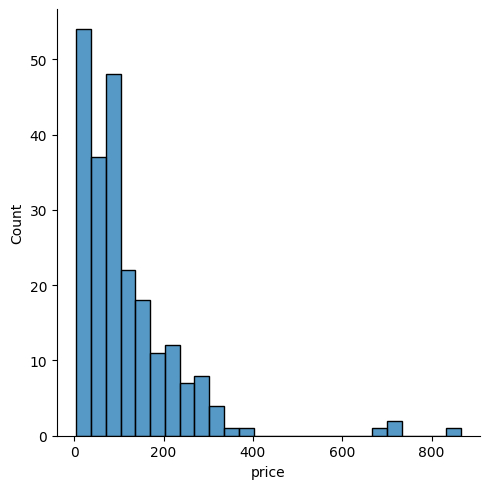

In [355]:
sns.displot(data=df_fixed[~df_fixed['peak_all_time'].isna()], x='price')

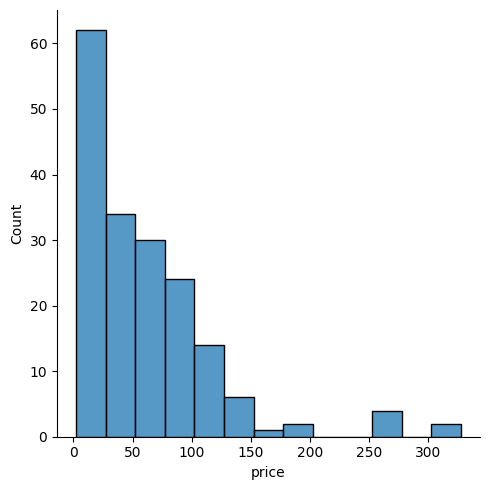

In [356]:
sns.displot(data=df_fixed[df_fixed['peak_all_time'].isna()], x='price')

Видно что распределение в целом похожее, но просто немного сдвинуто влево, явно имеет смысл добавить признак 'отсутсвие пикового онлайна'.

In [357]:
df_fixed['no_peak'] = df_fixed['peak_all_time'].isna().astype(float)


In [358]:
df_fixed['peak_all_time'].fillna(0, inplace = True)

/var/folders/gc/bympp97d7gb3r9135fkmc7w80000gn/T/ipykernel_99480/3557151054.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fixed['peak_all_time'].fillna(0, inplace = True)


In [359]:
df_fixed['lg_price'] = np.log(df_fixed['price'])

In [360]:
base_features = ['peak_all_time', 'number_of_langs', 'days_since_realease', 'big_developer', 'no_peak']

In [361]:
filtered_cats

['Free To Play Games',
 'Simulation Games',
 'Action Games',
 'Indie Games',
 'Racing Games',
 'Sports Games',
 'Strategy Games',
 'Adventure Games',
 'Massively Multiplayer Games',
 'Downloadable Content',
 'Casual Games',
 'RPG Games',
 'Early Access Games',
 'Hack and Slash Fury']

In [362]:
df_fixed

,age_rating,category,cross_platform,current_players,date,developer,file_size,languages,multiplayer,name,...,Massively Multiplayer Games,Downloadable Content,Casual Games,RPG Games,Early Access Games,Hack and Slash Fury,big_developer,days_since_realease,no_peak,lg_price
1,Not specified,[Simulation Games],No,12.0,2020-06-05,Pavel Kudinov,NaN,English,No,Space Simulation Toolkit,...,0,0,0,0,0,0,0.0,1798,0.0,4.164958
4,Not specified,[Action Games],No,4519.0,2023-12-13,VOID Interactive,NaN,"English, French, German, Korean, Simplified Ch...",No,Ready or Not,...,0,0,0,0,0,0,0.0,512,0.0,5.135740
6,12+,[Indie Games],Yes,68225.0,2016-02-26,ConcernedApe,NaN,"English, German, Spanish - Spain, Japanese, Po...",No,Stardew Valley,...,0,0,0,0,0,0,0.0,3359,0.0,3.988799
7,Not specified,"[Racing Games, Assetto Corsa Official Franchise]",No,9060.0,2014-12-19,Kunos Simulazioni,NaN,"English, Italian, Simplified Chinese, Traditio...",No,Assetto Corsa,...,0,0,0,0,0,0,0.0,3793,0.0,4.440767
9,3+,"[Sports Games, EA Sports Franchise]",No,156.0,2023-04-06,Electronic Arts - Tiburon,NaN,English,No,EA SPORTS™ PGA TOUR™,...,0,0,0,0,0,0,0.0,763,0.0,4.247066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,Not specified,[Simulation Games],No,NaN,2018-08-16,Immersive VR Education Ltd,NaN,English,No,Titanic VR,...,0,0,0,0,0,0,0.0,2457,1.0,4.276527
1166,Not specified,[Utilities],No,NaN,2018-09-11,SBSoftLab,NaN,"English, Russian",No,fpsVR,...,0,0,0,0,0,0,0.0,2431,1.0,2.889816
1168,Not specified,"[Simulation Games, Big Cheese Studio Franchise]",No,NaN,2021-07-29,GameBoom VR,NaN,"English, French, Italian, German, Spanish - Sp...",No,Cooking Simulator VR,...,0,0,0,0,0,0,0.0,1379,1.0,4.499699
1210,Not specified,"[Action Games, Eugen Systems' Wargame Franchis...",No,NaN,2024-05-22,Eugen Systems,NaN,"English, French, German, Spanish - Spain, Russ...",No,WARNO - Early Access Pack,...,0,1,0,0,0,0,0.0,351,1.0,3.804438


In [363]:
df_fixed

,age_rating,category,cross_platform,current_players,date,developer,file_size,languages,multiplayer,name,...,Massively Multiplayer Games,Downloadable Content,Casual Games,RPG Games,Early Access Games,Hack and Slash Fury,big_developer,days_since_realease,no_peak,lg_price
1,Not specified,[Simulation Games],No,12.0,2020-06-05,Pavel Kudinov,NaN,English,No,Space Simulation Toolkit,...,0,0,0,0,0,0,0.0,1798,0.0,4.164958
4,Not specified,[Action Games],No,4519.0,2023-12-13,VOID Interactive,NaN,"English, French, German, Korean, Simplified Ch...",No,Ready or Not,...,0,0,0,0,0,0,0.0,512,0.0,5.135740
6,12+,[Indie Games],Yes,68225.0,2016-02-26,ConcernedApe,NaN,"English, German, Spanish - Spain, Japanese, Po...",No,Stardew Valley,...,0,0,0,0,0,0,0.0,3359,0.0,3.988799
7,Not specified,"[Racing Games, Assetto Corsa Official Franchise]",No,9060.0,2014-12-19,Kunos Simulazioni,NaN,"English, Italian, Simplified Chinese, Traditio...",No,Assetto Corsa,...,0,0,0,0,0,0,0.0,3793,0.0,4.440767
9,3+,"[Sports Games, EA Sports Franchise]",No,156.0,2023-04-06,Electronic Arts - Tiburon,NaN,English,No,EA SPORTS™ PGA TOUR™,...,0,0,0,0,0,0,0.0,763,0.0,4.247066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,Not specified,[Simulation Games],No,NaN,2018-08-16,Immersive VR Education Ltd,NaN,English,No,Titanic VR,...,0,0,0,0,0,0,0.0,2457,1.0,4.276527
1166,Not specified,[Utilities],No,NaN,2018-09-11,SBSoftLab,NaN,"English, Russian",No,fpsVR,...,0,0,0,0,0,0,0.0,2431,1.0,2.889816
1168,Not specified,"[Simulation Games, Big Cheese Studio Franchise]",No,NaN,2021-07-29,GameBoom VR,NaN,"English, French, Italian, German, Spanish - Sp...",No,Cooking Simulator VR,...,0,0,0,0,0,0,0.0,1379,1.0,4.499699
1210,Not specified,"[Action Games, Eugen Systems' Wargame Franchis...",No,NaN,2024-05-22,Eugen Systems,NaN,"English, French, German, Spanish - Spain, Russ...",No,WARNO - Early Access Pack,...,0,1,0,0,0,0,0.0,351,1.0,3.804438


In [365]:
X = df_fixed[base_features + filtered_cats]
y = df_fixed['lg_price']

X = sm.add_constant(X)

model = sm.OLS(y, X)


result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               lg_price   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     8.270
Date:                Thu, 08 May 2025   Prob (F-statistic):           5.82e-18
Time:                        14:41:25   Log-Likelihood:                -541.89
No. Observations:                 406   AIC:                             1120.
Df Residuals:                     388   BIC:                             1192.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

/Users/gzlotin/metrics/.venv/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


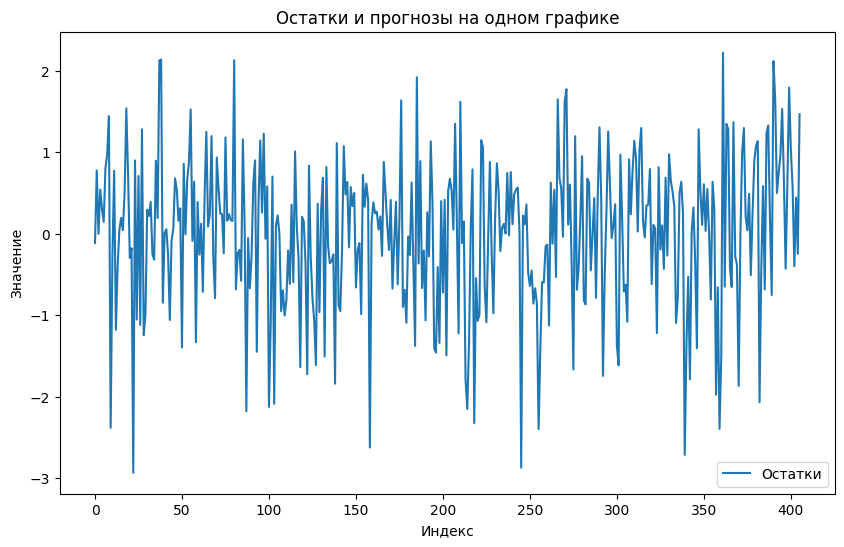

In [366]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=range(len(df_fixed['lg_price'])), y = result.resid, label='Остатки')

plt.legend()
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.title('Остатки и прогнозы на одном графике')
plt.show()

In [367]:
df_fixed['pred'] = result.predict()

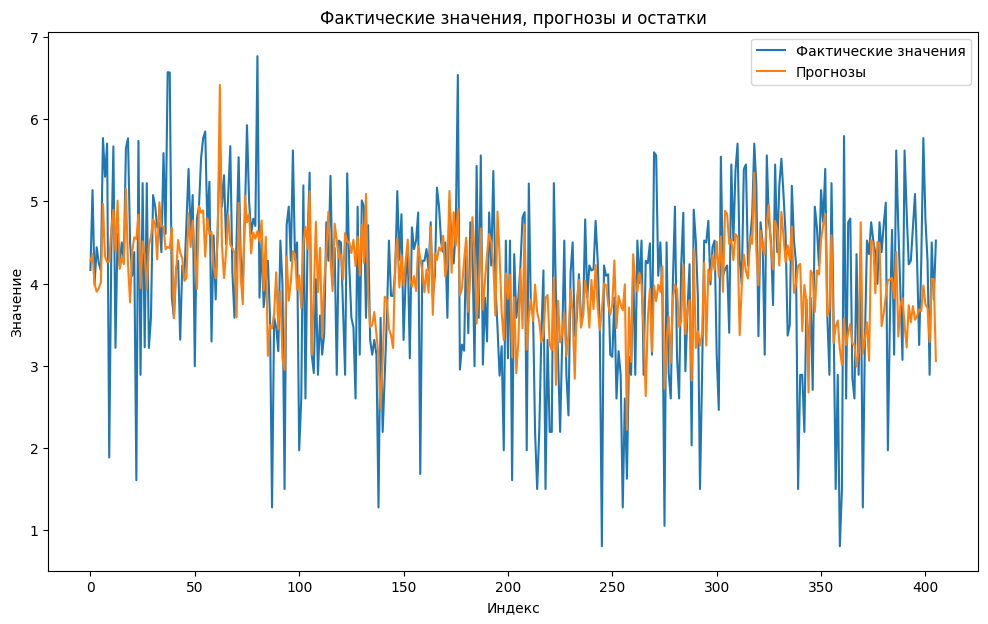

In [368]:
plt.figure(figsize=(12, 7))

x = range(len(df_fixed['lg_price']))

sns.lineplot(x=x, y=df_fixed['lg_price'], label='Фактические значения')

sns.lineplot(x=x, y=df_fixed['pred'], label='Прогнозы')

plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.title('Фактические значения, прогнозы и остатки')
plt.legend()
plt.show()

In [369]:
df_final = df_fixed.merge(tag_based_clustering, how = 'left', left_on = 'name', right_on = 'game')

df_final.shape

(406, 41)

In [370]:
cluster_ohe = pd.get_dummies(df_final['cluster_name'])
df_final = pd.concat([df_final, cluster_ohe], axis=1)

In [371]:
ohe_cols = df_final.columns[-10:]

df_final[ohe_cols] = df_final[ohe_cols].astype(float)

In [372]:
X = df_final[base_features + filtered_cats + ohe_cols.tolist()]
y = df_final['lg_price']

X = sm.add_constant(X)

model = sm.OLS(y, X)


result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               lg_price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     5.531
Date:                Thu, 08 May 2025   Prob (F-statistic):           2.06e-15
Time:                        14:41:37   Log-Likelihood:                -537.07
No. Observations:                 406   AIC:                             1130.
Df Residuals:                     378   BIC:                             1242.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

In [373]:
import pandas as pd
coef_table = pd.DataFrame({
    'coef': result.params,
    'p-value': result.pvalues
})
print(coef_table)


                                                            coef       p-value
const                                               4.295605e+00  9.927336e-24
peak_all_time                                       1.353878e-06  1.940091e-02
number_of_langs                                     1.567654e-02  2.889094e-02
days_since_realease                                -1.258385e-04  4.655942e-05
big_developer                                       4.029434e-01  9.264529e-02
no_peak                                            -5.191322e-01  3.211638e-06
Free To Play Games                                  6.633931e-16  7.188666e-01
Simulation Games                                    3.812862e-01  2.972780e-01
Action Games                                        9.533105e-02  7.920156e-01
Indie Games                                        -1.877988e-01  6.025815e-01
Racing Games                                        2.798655e-02  9.467582e-01
Sports Games                                       -

# Модель хекмана #

In [566]:
from copy import deepcopy

In [567]:
df['price']

0         0.00
1        64.39
2         0.00
3         0.00
4       169.99
         ...  
1210     44.90
1211     91.99
1212      0.00
1213      0.00
1214    160.99
Name: price, Length: 1071, dtype: float64

In [568]:
df_x = deepcopy(df)
df_x = df_x[df_x['number_of_langs'] < 40]
df_x = df_x[df_x['reviews_numbers'] > 70]

In [569]:
df_x['ftp'] = df_x['price'] == 0

In [570]:
df_x['no_peak'] = df_x['peak_all_time'].isna().astype(float)
df_x['peak_all_time'].fillna(0, inplace = True)


/var/folders/gc/bympp97d7gb3r9135fkmc7w80000gn/T/ipykernel_99480/2555032277.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_x['peak_all_time'].fillna(0, inplace = True)


In [571]:
df_x = df_x.merge(tag_based_clustering, how = 'left', left_on = 'name', right_on = 'game')

df_x.shape

(533, 39)

In [572]:
cluster_ohe = pd.get_dummies(df_x['cluster_name'])
df_x = pd.concat([df_x, cluster_ohe], axis=1)

In [573]:
ohe_cols = df_x.columns[-9:]

df_x[ohe_cols] = df_x[ohe_cols].astype(float)

In [574]:
df_x['ftp'].value_counts()

ftp
False    406
True     127
Name: count, dtype: int64

In [575]:
df_x['date'] = pd.to_datetime(df_x['date'])
df_x['days_since_realease'] = np.abs(df_x['date'] - pd.Timestamp.today()).dt.days

In [576]:
features = base_features + filtered_cats + ohe_cols.tolist()

In [577]:
features.remove('Free To Play Games')

In [578]:
X.shape

(533, 28)

In [579]:
df_x['ftp'].value_counts()

ftp
False    406
True     127
Name: count, dtype: int64

In [580]:
X = df_x[features]
y = df_x['ftp'].astype(float)

X = sm.add_constant(X)

model = sm.Probit(y, X)

result = model.fit(method = 'bfgs')

print(result.summary())

         Current function value: 0.372755
         Iterations: 35
         Function evaluations: 48
         Gradient evaluations: 48
                          Probit Regression Results                           
Dep. Variable:                    ftp   No. Observations:                  533
Model:                         Probit   Df Residuals:                      506
Method:                           MLE   Df Model:                           26
Date:                Thu, 08 May 2025   Pseudo R-squ.:                  0.3211
Time:                        15:42:28   Log-Likelihood:                -198.68
converged:                      False   LL-Null:                       -292.66
Covariance Type:            nonrobust   LLR p-value:                 1.733e-26
                                                                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

/Users/gzlotin/metrics/.venv/lib/python3.9/site-packages/scipy/optimize/_optimize.py:1292: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/Users/gzlotin/metrics/.venv/lib/python3.9/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/gzlotin/metrics/.venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [581]:
!pip install scikit-learn

In [582]:
from sklearn.metrics import roc_auc_score, average_precision_score, confusion_matrix, classification_report

y_pred_proba = result.predict(X)

# ROC-AUC
roc_auc = roc_auc_score(y, y_pred_proba)
print(f"ROC-AUC: {roc_auc:.3f}")

# PR-AUC (Precision-Recall AUC)
pr_auc = average_precision_score(y, y_pred_proba)
print(f"PR-AUC: {pr_auc:.3f}")

# Дополнительные метрики (при пороге 0.5)
y_pred = (y_pred_proba >= 0.5).astype(int)
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

ROC-AUC: 0.855
PR-AUC: 0.718
[[393  13]
 [ 72  55]]
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.90       406
         1.0       0.81      0.43      0.56       127

    accuracy                           0.84       533
   macro avg       0.83      0.70      0.73       533
weighted avg       0.84      0.84      0.82       533



In [583]:
df_x['probit_score'] = result.predict(X, linear=True)

/Users/gzlotin/metrics/.venv/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:530: FutureWarning: linear keyword is deprecated, use which="linear"
  warnings.warn(msg, FutureWarning)


In [584]:
from scipy.stats import norm

In [585]:
df_x['lambda_heckman'] = norm.pdf(df_x['probit_score']) / norm.cdf(df_x['probit_score'])

In [586]:
df_paid = df_x[df_x['ftp'] == 0].copy()
X_out = sm.add_constant(df_paid[features + ['lambda_heckman']])
y_out = np.log(df_paid['price'])

ols_model = sm.OLS(y_out, X_out)
ols_res = ols_model.fit()
print(ols_res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     5.505
Date:                Thu, 08 May 2025   Prob (F-statistic):           2.53e-15
Time:                        15:42:29   Log-Likelihood:                -537.34
No. Observations:                 406   AIC:                             1131.
Df Residuals:                     378   BIC:                             1243.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

In [587]:
import pandas as pd
coef_table = pd.DataFrame({
    'coef': ols_res.params,
    'p-value': ols_res.pvalues
})
print(coef_table)


                                                            coef       p-value
const                                               4.165075e+00  1.767410e-26
peak_all_time                                       1.411554e-06  1.578546e-02
number_of_langs                                     2.879653e-02  4.150072e-01
days_since_realease                                -1.426960e-04  7.951549e-03
big_developer                                       2.812246e-01  5.355025e-01
no_peak                                            -6.372482e-01  7.916141e-02
Simulation Games                                    1.081437e+00  5.561897e-01
Action Games                                        7.460442e-01  6.642104e-01
Indie Games                                         7.302412e-01  7.699740e-01
Racing Games                                        8.419610e-01  6.927826e-01
Sports Games                                        7.359591e-01  7.565453e-01
Strategy Games                                      

In [588]:
rs = coef_table[coef_table['p-value'] < 0.6].index.tolist()

rs

['const',
 'peak_all_time',
 'number_of_langs',
 'days_since_realease',
 'big_developer',
 'no_peak',
 'Simulation Games',
 'Strategy Games',
 'Downloadable Content',
 'Early Access Games',
 'Hack and Slash Fury',
 '**Competitive & Tactical Multiplayer Hybrids with Card, Shooter, and Strategy Elements**']

In [589]:
df_paid.shape

(406, 52)